## Rangel Condor Dario

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.offsetbox as offsetbox
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress

In [37]:
# Set path for to locate dataset
nba1 = "../league_data/general_1-50.csv"
nba2 = "../league_data/general_51-100.csv" 
nba3 = "../league_data/general_101-150.csv"
nba4 = "../league_data/general_151-200.csv"


In [38]:
#
nba01 = pd.read_csv(nba1)
nba02 = pd.read_csv(nba2)
nba03 = pd.read_csv(nba3)
nba04 = pd.read_csv(nba4)
magic23 = pd.read_csv("../orlando_data/magic_22_23.csv")
magic22_23_df = magic23

In [39]:
# Combine the data into a single dataset
frames = [nba01,nba02,nba03,nba04]
league_df = pd.concat(frames)

In [40]:
# Dataframe of the best 200 players in the NBA stat averages per game of the 2023 season
league_df.head(75)

,Unnamed: 0,PLAYER,TEAM,Position,AGE,Games Played,Wins,Loses,Minutes,Points,...,Rebounds,Assists,Turnover,Steals,Blocks,Personal Foul,Fantsy Points,Double Doubles,Triple Doubles,Plus-Minus
0,1,Joel Embiid,PHI,Center,29,66,43,23,34.6,33.1,...,10.2,4.2,3.4,1.0,1.7,3.1,56.2,39,1,6.4
1,2,Luka Doncic,DAL,Forward,24,66,33,33,36.2,32.4,...,8.6,8.0,3.6,1.4,0.5,2.5,56.8,36,10,1.9
2,3,Damian Lillard,POR,Guard,32,58,27,31,36.3,32.2,...,4.8,7.3,3.3,0.9,0.3,1.9,49.1,16,2,1.8
3,4,Shai Gilgeous-Alexander,OKC,Guard,24,68,33,35,35.5,31.4,...,4.8,5.5,2.8,1.6,1.0,2.8,50.4,3,0,2.2
4,5,Giannis Antetokounmpo,MIL,Forward,28,63,47,16,32.1,31.1,...,11.8,5.7,3.9,0.8,0.8,3.1,54.8,46,6,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,71,Nikola Vucevic,CHI,Center,32,82,40,42,33.5,17.6,...,11.0,3.2,1.7,0.7,0.7,2.2,38.3,51,1,-0.2
21,72,Michael Porter Jr.,DEN,Forward,24,62,41,21,29.0,17.4,...,5.5,1.0,1.1,0.6,0.5,1.9,27.7,3,0,6.7
22,73,Gary Trent Jr.,TOR,Guard,24,66,31,35,32.1,17.4,...,2.6,1.6,0.8,1.6,0.2,1.5,27.5,0,0,-0.8
23,74,Spencer Dinwiddie,BKN,Guard,30,79,41,38,34.5,17.3,...,3.4,6.5,1.8,0.8,0.3,2.4,32.8,9,0,-0.1


In [41]:
#Name of the columns
league_df.columns

Index(['Unnamed: 0', 'PLAYER', 'TEAM', 'Position', 'AGE', 'Games Played',
       'Wins', 'Loses', 'Minutes', 'Points', 'Field Goals Made',
       'Field Goals Attmepted ', 'Field Goal %', '3 Points Made',
       '3 Points Attempted', '3 Point %', 'Free Throw Made',
       'Free throw Attempted', 'Free Throw %', 'Offensive Rebound',
       'Defensive Rebound', 'Rebounds', 'Assists ', 'Turnover', 'Steals',
       'Blocks', 'Personal Foul', 'Fantsy Points', 'Double Doubles',
       'Triple Doubles', 'Plus-Minus'],
      dtype='object')

In [42]:
#DataFrame of the Orlando Magic Team of 2023
magic23.head(5)

,Unnamed: 0,PLAYER,TEAM,Position,AGE,Games Played,Wins,Loses,Minutes,Points,...,Rebounds,Assists,Turnover,Steals,Blocks,Personal Foul,Fantsy Points,Double Doubles,Triple Doubles,Plus-Minus
0,58,Paolo Banchero,ORL,Forwards,20,72,31,41,33.7,20.0,...,6.9,3.7,2.8,0.8,0.5,2.2,35.2,14,0,-3.0
1,66,Franz Wagner,ORL,Forwards,21,80,33,47,32.6,18.6,...,4.1,3.5,2.1,1.0,0.2,2.3,30.2,2,0,0.6
2,93,Wendell Carter Jr.,ORL,Center,24,57,26,31,29.6,15.2,...,8.7,2.3,1.9,0.5,0.6,2.8,30.6,21,0,-0.7
3,111,Markelle Fultz,ORL,Guard,24,60,29,31,29.6,14.0,...,3.9,5.7,2.3,1.5,0.4,2.2,30.5,3,0,-2.2
4,120,Cole Anthony,ORL,Guard,22,60,28,32,25.9,13.0,...,4.8,3.9,1.5,0.6,0.5,2.6,26.5,1,0,-0.4


In [43]:
#Replaced a string inside the column of the magic file to match the other dataset
magic23["Position"] = magic23["Position"].str.replace("Forwards","Forward", regex=False)

magic23.head(14)

#League average of players by position
league_positions_age = league_df.groupby(['Position'])["AGE"].mean()

#League average games played by position
league_positions_gp = league_df.groupby(['Position'])["Games Played"].mean()

#League average minutes played by position
league_positions_mins = league_df.groupby(['Position'])["Minutes"].mean()

#League average points per game by position
league_positions_ppg = league_df.groupby(['Position'])["Points"].mean()
league_positions_ppg

#League average field goals attmepted per game by position
league_positions_fga = league_df.groupby(['Position'])["Field Goals Attmepted "].mean()

#League average field goals percentage per game by position
league_positions_fgp = league_df.groupby(['Position'])["Field Goal %"].mean()

In [44]:
#League average 3 points attmepted per game by position
league_positions_3pa = league_df.groupby(['Position'])["3 Points Attempted"].mean()

In [45]:
#League average 3 points percentage per game by position
league_positions_3pp = league_df.groupby(['Position'])["3 Point %"].mean()

In [46]:
#League average free throws attmepted per game by position
league_positions_fta = league_df.groupby(['Position'])["Free throw Attempted"].mean()

In [47]:
#League average free throws percentage per game by position
league_positions_ftp = league_df.groupby(['Position'])["Free Throw %"].mean()

In [48]:
#League average offensive rebounds per game by position
league_positions_orb = league_df.groupby(['Position'])["Offensive Rebound"].mean()

In [49]:
#League average defensive rebounds per game by position
league_positions_drb = league_df.groupby(['Position'])["Defensive Rebound"].mean()

In [50]:
#League average assists per game by position
league_positions_ast = league_df.groupby(['Position'])["Assists "].mean()

In [51]:
#League average steals per game by position
league_positions_to = league_df.groupby(['Position'])["Turnover"].mean()

In [52]:
#League average turnovers per game by position
league_positions_stl = league_df.groupby(['Position'])["Steals"].mean()

In [53]:
#League average blocks per game by position
league_positions_blk = league_df.groupby(['Position'])["Blocks"].mean()

In [54]:
#League average personal foul per game by position
league_positions_pf = league_df.groupby(['Position'])["Personal Foul"].mean()

In [55]:
#League average plus-minus per game by position
league_positions_eff = league_df.groupby(['Position'])["Plus-Minus"].mean()

In [56]:
#Made New DF with the average of each player but organized by position
league_average_position = pd.DataFrame({"Age":league_positions_age,"Games Played":league_positions_gp,
                                        "Minutes":league_positions_mins,"Points":league_positions_ppg,
                                        "Field Goals Attmepted":league_positions_fga,"Field Goal %":league_positions_fgp,
                                       "3 Points Attempted":league_positions_3pa,"3 Point %":league_positions_3pp,
                                       "Free throw Attempted":league_positions_fta,"Free Throw %":league_positions_ftp,
                                       "Offensive Rebound":league_positions_orb,"Defensive Rebound":league_positions_drb,
                                        "Rebounds":league_positions_drb,
                                      "Assists":league_positions_ast,"Steals":league_positions_stl,"Turnover":league_positions_to,
                                        "Blocks":league_positions_blk,"Personal Foul":league_positions_pf,
                                        "Plus-Minus":league_positions_eff})
#Formated DF
league_average_position["Age"]=league_average_position["Age"].map("{:,.1f}".format)
league_average_position["Games Played"]=league_average_position["Games Played"].map("{:,.1f}".format)
league_average_position["Minutes"]=league_average_position["Minutes"].map("{:,.2f}".format)
league_average_position["Points"]=league_average_position["Points"].map("{:,.2f}".format)
league_average_position["Field Goals Attmepted"]=league_average_position["Field Goals Attmepted"].map("{:,.2f}".format)
league_average_position["Field Goal %"]=league_average_position["Field Goal %"].map("{:,.2f}".format)
league_average_position["3 Points Attempted"]=league_average_position["3 Points Attempted"].map("{:,.2f}".format)
league_average_position["3 Point %"]=league_average_position["3 Point %"].map("{:,.2f}".format)
league_average_position["Free throw Attempted"]=league_average_position["Free throw Attempted"].map("{:,.2f}".format)
league_average_position["Free Throw %"]=league_average_position["Free Throw %"].map("{:,.2f}".format)
league_average_position["Offensive Rebound"]=league_average_position["Offensive Rebound"].map("{:,.2f}".format)
league_average_position["Defensive Rebound"]=league_average_position["Defensive Rebound"].map("{:,.2f}".format)
league_average_position["Rebounds"]=league_average_position["Rebounds"].map("{:,.2f}".format)
league_average_position["Assists"]=league_average_position["Assists"].map("{:,.2f}".format)
league_average_position["Steals"]=league_average_position["Steals"].map("{:,.2f}".format)
league_average_position["Turnover"]=league_average_position["Turnover"].map("{:,.2f}".format)
league_average_position["Blocks"]=league_average_position["Blocks"].map("{:,.2f}".format)
league_average_position["Personal Foul"]=league_average_position["Personal Foul"].map("{:,.2f}".format)
league_average_position["Plus-Minus"]=league_average_position["Plus-Minus"].map("{:,.2f}".format)


league_average_position.head(5)

,Age,Games Played,Minutes,Points,Field Goals Attmepted,Field Goal %,3 Points Attempted,3 Point %,Free throw Attempted,Free Throw %,Offensive Rebound,Defensive Rebound,Rebounds,Assists,Steals,Turnover,Blocks,Personal Foul,Plus-Minus
Position,,,,,,,,,,,,,,,,,,,
Center,27.3,63.9,28.31,15.69,10.69,56.33,2.31,26.56,3.84,74.54,2.15,6.35,6.35,2.58,0.71,1.83,1.11,2.79,0.78
Forward,25.3,64.6,29.98,16.44,12.49,48.25,4.51,35.21,3.56,79.09,1.20,4.21,4.21,3.03,0.83,1.79,0.53,2.27,-0.27
Guard,26.6,62.2,29.45,16.31,12.69,45.60,5.36,36.54,3.27,81.02,0.73,3.15,3.15,4.35,0.98,1.90,0.32,2.08,0.47


In [57]:
#Used Loc to have the ability to call items by position from average by posistion DF(The df above)
league_average_forward = league_average_position.loc["Forward"].astype(float)

In [58]:
#Used Loc to have the ability to call items by position from average by posistion DF(The df above)
league_average_center = league_average_position.loc["Center"].astype(float)

In [59]:
#Used Loc to have the ability to call items by position from average by posistion DF(The df above)
league_average_guard = league_average_position.loc["Guard"].astype(float)

In [60]:
#Made DF from the Magic23 DF and grouped it by player
orl_players23 = magic23.groupby(["PLAYER"]).mean(numeric_only=True)
orl_players23

,Unnamed: 0,AGE,Games Played,Wins,Loses,Minutes,Points,Field Goals Made,Field Goals Attmepted,Field Goal %,...,Rebounds,Assists,Turnover,Steals,Blocks,Personal Foul,Fantsy Points,Double Doubles,Triple Doubles,Plus-Minus
PLAYER,,,,,,,,,,,,,,,,,,,,,
Admiral Schofield,402.0,26.0,37.0,14.0,23.0,12.2,4.2,1.5,3.3,45.1,...,1.7,0.8,0.4,0.2,0.1,1.6,8.1,0.0,0.0,-2.1
Bol Bol,212.0,23.0,70.0,26.0,44.0,21.5,9.1,3.7,6.8,54.6,...,5.8,1.0,1.6,0.4,1.2,1.3,20.8,6.0,0.0,-2.1
Caleb Houstan,422.0,20.0,51.0,20.0,31.0,15.9,3.8,1.3,3.6,36.3,...,1.9,0.6,0.4,0.2,0.1,1.2,7.8,0.0,0.0,-1.6
Chuma Okeke,377.0,24.0,27.0,8.0,19.0,19.2,4.7,1.6,4.5,35.2,...,3.6,1.4,0.6,0.7,0.4,1.5,13.8,0.0,0.0,-4.4
Cole Anthony,120.0,22.0,60.0,28.0,32.0,25.9,13.0,4.6,10.2,45.4,...,4.8,3.9,1.5,0.6,0.5,2.6,26.5,1.0,0.0,-0.4
Franz Wagner,66.0,21.0,80.0,33.0,47.0,32.6,18.6,6.8,14.0,48.5,...,4.1,3.5,2.1,1.0,0.2,2.3,30.2,2.0,0.0,0.6
Gary Harris,233.0,28.0,48.0,22.0,26.0,24.7,8.3,2.9,6.4,45.0,...,2.0,1.2,0.6,0.9,0.3,1.9,15.5,0.0,0.0,-1.8
Goga Bitadze,394.0,23.0,38.0,13.0,25.0,12.0,4.4,1.8,3.3,55.2,...,3.6,1.0,0.6,0.4,0.7,1.7,13.0,2.0,0.0,0.7
Jalen Suggs,180.0,21.0,53.0,20.0,33.0,23.5,9.9,3.5,8.4,41.9,...,3.0,2.9,1.8,1.3,0.5,2.3,21.5,0.0,0.0,-0.8


In [61]:
#Used Loc to get each of the Gaurds in the DF above so I can access each row
m_fultz = orl_players23.loc["Markelle Fultz"].astype(float)
mc_will=orl_players23.loc["Michael Carter-Williams"].astype(float)
j_sug=orl_players23.loc["Jalen Suggs"].astype(float)
g_har=orl_players23.loc["Gary Harris"].astype(float)
c_ant=orl_players23.loc["Cole Anthony"].astype(float)
j_scrub=orl_players23.loc["Jay Scrubb"].astype(float)
C_hou=orl_players23.loc["Caleb Houstan"].astype(float)
k_har=orl_players23.loc["Kevon Harris"].astype(float)

In [62]:
#Used Loc to get each of the Forwards in the DF above so I can access each row
p_banchero = orl_players23.loc["Paolo Banchero"].astype(float)
fr_wag = orl_players23.loc["Franz Wagner"].astype(float)
jon_isa = orl_players23.loc["Jonathan Isaac"].astype(float)
ad_s = orl_players23.loc["Admiral Schofield"].astype(float)
c_oke = orl_players23.loc["Chuma Okeke"].astype(float)

In [63]:
bol = orl_players23.loc["Bol Bol"].astype(float)
wen_car = orl_players23.loc["Wendell Carter Jr."].astype(float)
mo_wag = orl_players23.loc["Moritz Wagner"].astype(float)
go_bit = orl_players23.loc["Goga Bitadze"].astype(float)

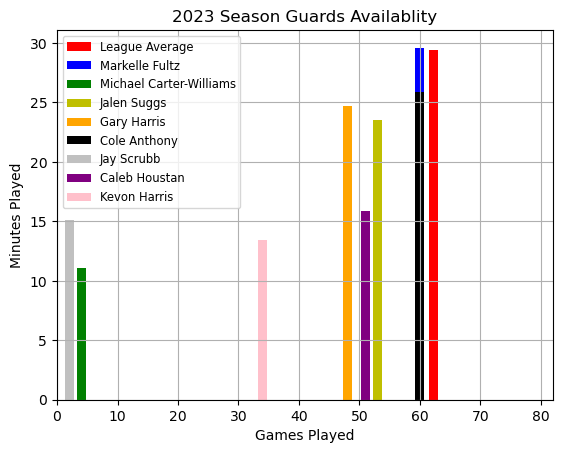

In [64]:
#
plt.bar(league_average_guard["Games Played"],league_average_guard["Minutes"],color="r",label="League Average", width=1.5)
plt.bar(m_fultz["Games Played"],m_fultz["Minutes"],color="blue",label="Markelle Fultz", width=1.5)
plt.bar(mc_will["Games Played"],mc_will["Minutes"],color="g",label="Michael Carter-Williams", width=1.5)
plt.bar(j_sug["Games Played"],j_sug["Minutes"],color="y",label="Jalen Suggs", width=1.5)
plt.bar(g_har["Games Played"],g_har["Minutes"],color="orange",label="Gary Harris", width=1.5)
plt.bar(c_ant["Games Played"],c_ant["Minutes"],color="black",label="Cole Anthony", width=1.5)
plt.bar(j_scrub["Games Played"],j_scrub["Minutes"],color="silver",label="Jay Scrubb", width=1.5)
plt.bar(C_hou["Games Played"],C_hou["Minutes"],color="purple",label="Caleb Houstan", width=1.5)
plt.bar(k_har["Games Played"],k_har["Minutes"],color="pink",label="Kevon Harris", width=1.5)

plt.title("2023 Season Guards Availablity")
plt.xlabel("Games Played")
plt.ylabel("Minutes Played")
plt.legend(fontsize="small")
plt.xlim(0,82)
plt.grid()
plt.show()

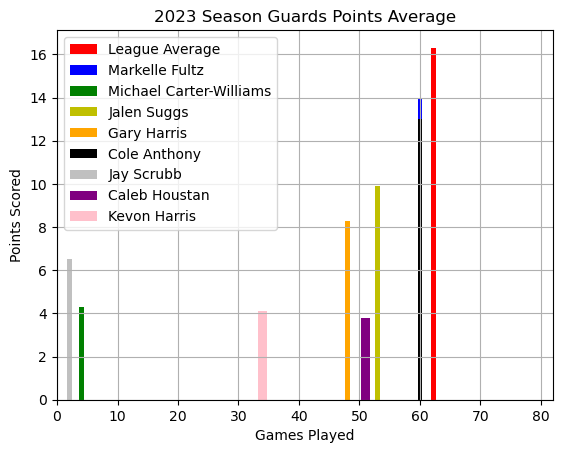

In [65]:
# Used the games plated as an X, then what i wanted to measure as a Y, and made a bar graph
plt.bar(league_average_guard["Games Played"],league_average_guard["Points"],color="r",label="League Average")
plt.bar(m_fultz["Games Played"],m_fultz["Points"],color="blue",label="Markelle Fultz")
plt.bar(mc_will["Games Played"],mc_will["Points"],color="g",label="Michael Carter-Williams")
plt.bar(j_sug["Games Played"],j_sug["Points"],color="y",label="Jalen Suggs")
plt.bar(g_har["Games Played"],g_har["Points"],color="orange",label="Gary Harris")
plt.bar(c_ant["Games Played"],c_ant["Points"],color="black",label="Cole Anthony")
plt.bar(j_scrub["Games Played"],j_scrub["Points"],color="silver",label="Jay Scrubb")
plt.bar(C_hou["Games Played"],C_hou["Points"],color="purple",label="Caleb Houstan", width=1.5)
plt.bar(k_har["Games Played"],k_har["Points"],color="pink",label="Kevon Harris", width=1.5)

plt.title("2023 Season Guards Points Average")
plt.xlabel("Games Played")
plt.ylabel("Points Scored")
plt.legend()
plt.xlim(0,82)
plt.grid()
plt.show()

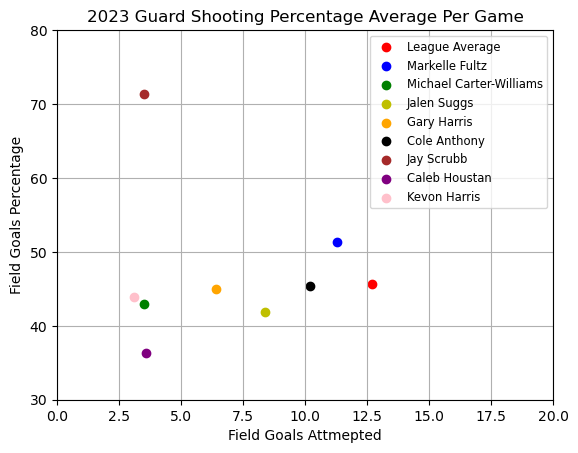

In [66]:
plt.scatter(league_average_guard["Field Goals Attmepted"],league_average_guard["Field Goal %"],color="r",label="League Average")
plt.scatter(m_fultz["Field Goals Attmepted "],m_fultz["Field Goal %"],color="blue",label="Markelle Fultz")
plt.scatter(mc_will["Field Goals Attmepted "],mc_will["Field Goal %"],color="g",label="Michael Carter-Williams")
plt.scatter(j_sug["Field Goals Attmepted "],j_sug["Field Goal %"],color="y",label="Jalen Suggs")
plt.scatter(g_har["Field Goals Attmepted "],g_har["Field Goal %"],color="orange",label="Gary Harris")
plt.scatter(c_ant["Field Goals Attmepted "],c_ant["Field Goal %"],color="black",label="Cole Anthony")
plt.scatter(j_scrub["Field Goals Attmepted "],j_scrub["Field Goal %"],color="brown",label="Jay Scrubb")
plt.scatter(C_hou["Field Goals Attmepted "],C_hou["Field Goal %"],color="purple",label="Caleb Houstan")
plt.scatter(k_har["Field Goals Attmepted "],k_har["Field Goal %"],color="pink",label="Kevon Harris")

plt.title("2023 Guard Shooting Percentage Average Per Game")
plt.xlabel("Field Goals Attmepted")
plt.ylabel("Field Goals Percentage")
plt.legend(fontsize="small")
plt.xlim(0,20)
plt.ylim(30,80)
plt.grid()
plt.show()

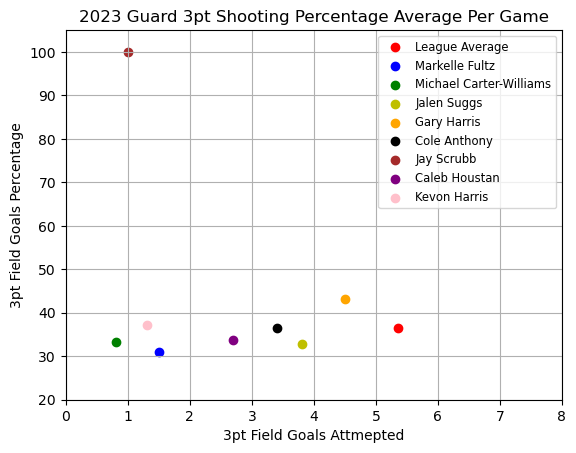

In [67]:
plt.scatter(league_average_guard["3 Points Attempted"],league_average_guard["3 Point %"],color="r",label="League Average")
plt.scatter(m_fultz["3 Points Attempted"],m_fultz["3 Point %"],color="blue",label="Markelle Fultz")
plt.scatter(mc_will["3 Points Attempted"],mc_will["3 Point %"],color="g",label="Michael Carter-Williams")
plt.scatter(j_sug["3 Points Attempted"],j_sug["3 Point %"],color="y",label="Jalen Suggs")
plt.scatter(g_har["3 Points Attempted"],g_har["3 Point %"],color="orange",label="Gary Harris")
plt.scatter(c_ant["3 Points Attempted"],c_ant["3 Point %"],color="black",label="Cole Anthony")
plt.scatter(j_scrub["3 Points Attempted"],j_scrub["3 Point %"],color="brown",label="Jay Scrubb")
plt.scatter(C_hou["3 Points Attempted"],C_hou["3 Point %"],color="purple",label="Caleb Houstan")
plt.scatter(k_har["3 Points Attempted"],k_har["3 Point %"],color="pink",label="Kevon Harris")

plt.title("2023 Guard 3pt Shooting Percentage Average Per Game")
plt.xlabel("3pt Field Goals Attmepted")
plt.ylabel("3pt Field Goals Percentage")
plt.legend(fontsize="small")
plt.xlim(0,8)
plt.ylim(20,105)
plt.grid()
plt.show()

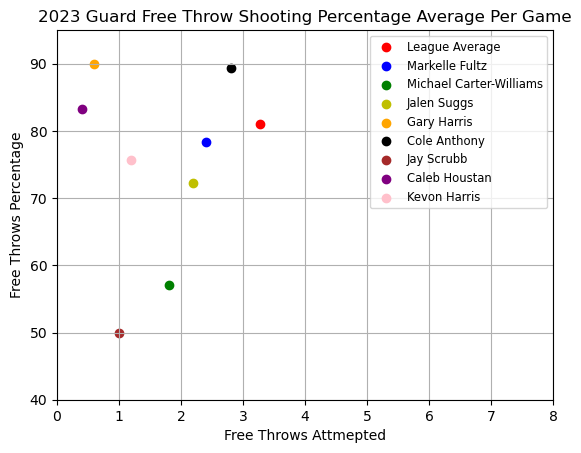

In [68]:
plt.scatter(league_average_guard["Free throw Attempted"],league_average_guard["Free Throw %"],color="r",label="League Average")
plt.scatter(m_fultz["Free throw Attempted"],m_fultz["Free Throw %"],color="blue",label="Markelle Fultz")
plt.scatter(mc_will["Free throw Attempted"],mc_will["Free Throw %"],color="g",label="Michael Carter-Williams")
plt.scatter(j_sug["Free throw Attempted"],j_sug["Free Throw %"],color="y",label="Jalen Suggs")
plt.scatter(g_har["Free throw Attempted"],g_har["Free Throw %"],color="orange",label="Gary Harris")
plt.scatter(c_ant["Free throw Attempted"],c_ant["Free Throw %"],color="black",label="Cole Anthony")
plt.scatter(j_scrub["Free throw Attempted"],j_scrub["Free Throw %"],color="brown",label="Jay Scrubb")
plt.scatter(C_hou["Free throw Attempted"],C_hou["Free Throw %"],color="purple",label="Caleb Houstan")
plt.scatter(k_har["Free throw Attempted"],k_har["Free Throw %"],color="pink",label="Kevon Harris")

plt.title("2023 Guard Free Throw Shooting Percentage Average Per Game")
plt.xlabel("Free Throws Attmepted")
plt.ylabel("Free Throws Percentage")
plt.legend(fontsize="small")
plt.xlim(0,8)
plt.ylim(40,95)
plt.grid()
plt.show()

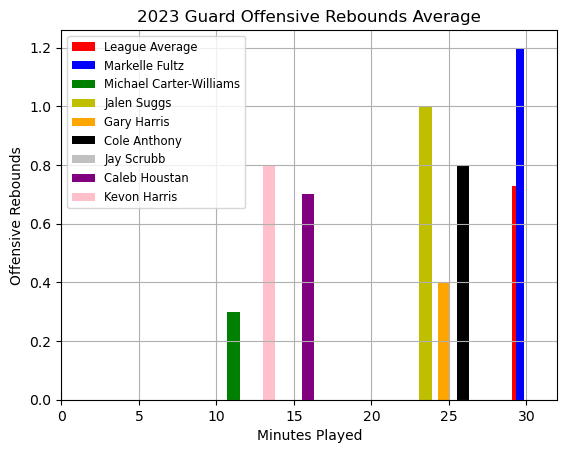

In [69]:
plt.bar(league_average_guard["Minutes"],league_average_guard["Offensive Rebound"],color="r",label="League Average")

plt.bar(m_fultz["Minutes"],m_fultz["Offensive Rebound"],color="blue",label="Markelle Fultz", width=.5)

plt.bar(mc_will["Minutes"],mc_will["Offensive Rebound"],color="g",label="Michael Carter-Williams")

plt.bar(j_sug["Minutes"],j_sug["Offensive Rebound"],color="y",label="Jalen Suggs")

plt.bar(g_har["Minutes"],g_har["Offensive Rebound"],color="orange",label="Gary Harris")

plt.bar(c_ant["Minutes"],c_ant["Offensive Rebound"],color="black",label="Cole Anthony")

plt.bar(j_scrub["Minutes"],j_scrub["Offensive Rebound"],color="silver",label="Jay Scrubb")
plt.bar(C_hou["Minutes"],C_hou["Offensive Rebound"],color="purple",label="Caleb Houstan")
plt.bar(k_har["Minutes"],k_har["Offensive Rebound"],color="pink",label="Kevon Harris")


plt.title("2023 Guard Offensive Rebounds Average")
plt.xlabel("Minutes Played")
plt.ylabel("Offensive Rebounds")
plt.legend(fontsize="small")
plt.xlim(0,32)
plt.grid()
plt.show()

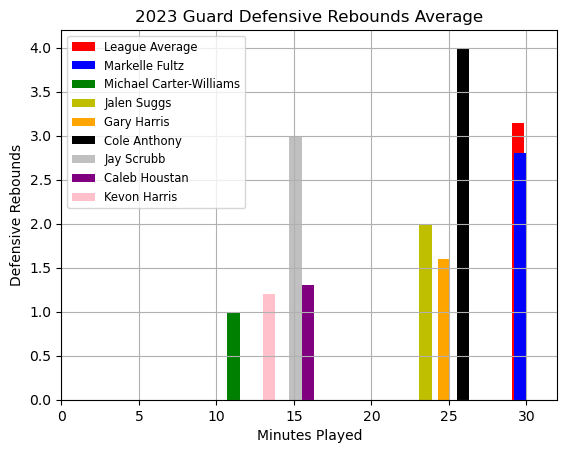

In [70]:
plt.bar(league_average_guard["Minutes"],league_average_guard["Defensive Rebound"],color="r",label="League Average")
plt.bar(m_fultz["Minutes"],m_fultz["Defensive Rebound"],color="blue",label="Markelle Fultz")
plt.bar(mc_will["Minutes"],mc_will["Defensive Rebound"],color="g",label="Michael Carter-Williams")
plt.bar(j_sug["Minutes"],j_sug["Defensive Rebound"],color="y",label="Jalen Suggs")
plt.bar(g_har["Minutes"],g_har["Defensive Rebound"],color="orange",label="Gary Harris")
plt.bar(c_ant["Minutes"],c_ant["Defensive Rebound"],color="black",label="Cole Anthony")
plt.bar(j_scrub["Minutes"],j_scrub["Defensive Rebound"],color="silver",label="Jay Scrubb")
plt.bar(C_hou["Minutes"],C_hou["Defensive Rebound"],color="purple",label="Caleb Houstan")
plt.bar(k_har["Minutes"],k_har["Defensive Rebound"],color="pink",label="Kevon Harris")

plt.title("2023 Guard Defensive Rebounds Average")
plt.xlabel("Minutes Played")
plt.ylabel("Defensive Rebounds")
plt.legend(fontsize="small")
plt.xlim(0,32)
plt.grid()
plt.show()

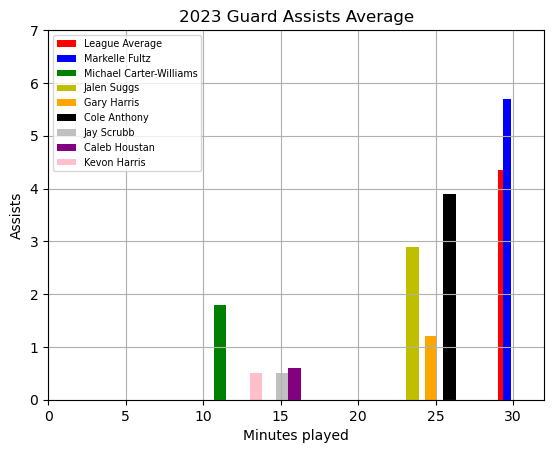

In [71]:
plt.bar(league_average_guard["Minutes"],league_average_guard["Assists"],color="r",label="League Average")
plt.bar(m_fultz["Minutes"],m_fultz["Assists "],color="blue",label="Markelle Fultz", width=.5)
plt.bar(mc_will["Minutes"],mc_will["Assists "],color="g",label="Michael Carter-Williams")
plt.bar(j_sug["Minutes"],j_sug["Assists "],color="y",label="Jalen Suggs")
plt.bar(g_har["Minutes"],g_har["Assists "],color="orange",label="Gary Harris")
plt.bar(c_ant["Minutes"],c_ant["Assists "],color="black",label="Cole Anthony")
plt.bar(j_scrub["Minutes"],j_scrub["Assists "],color="silver",label="Jay Scrubb")
plt.bar(C_hou["Minutes"],C_hou["Assists "],color="purple",label="Caleb Houstan")
plt.bar(k_har["Minutes"],k_har["Assists "],color="pink",label="Kevon Harris")

plt.title("2023 Guard Assists Average")
plt.xlabel("Minutes played")
plt.ylabel("Assists")
plt.legend(fontsize="x-small")
plt.xlim(0,32)
plt.ylim(0,7)
plt.grid()
plt.show()

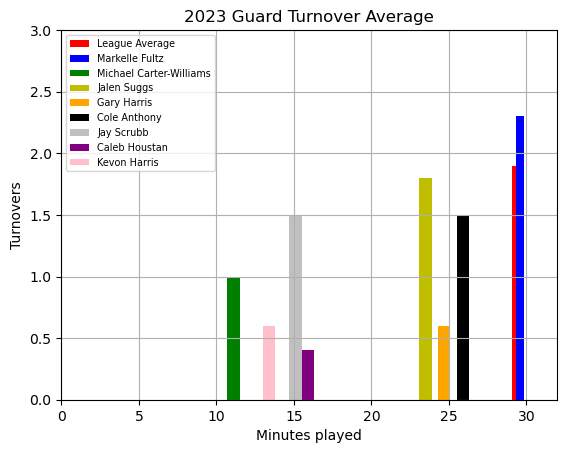

In [72]:
plt.bar(league_average_guard["Minutes"],league_average_guard["Turnover"],color="r",label="League Average")
plt.bar(m_fultz["Minutes"],m_fultz["Turnover"],color="blue",label="Markelle Fultz", width=.5)
plt.bar(mc_will["Minutes"],mc_will["Turnover"],color="g",label="Michael Carter-Williams")
plt.bar(j_sug["Minutes"],j_sug["Turnover"],color="y",label="Jalen Suggs")
plt.bar(g_har["Minutes"],g_har["Turnover"],color="orange",label="Gary Harris")
plt.bar(c_ant["Minutes"],c_ant["Turnover"],color="black",label="Cole Anthony")
plt.bar(j_scrub["Minutes"],j_scrub["Turnover"],color="silver",label="Jay Scrubb")
plt.bar(C_hou["Minutes"],C_hou["Turnover"],color="purple",label="Caleb Houstan")
plt.bar(k_har["Minutes"],k_har["Turnover"],color="pink",label="Kevon Harris")

plt.title("2023 Guard Turnover Average")
plt.xlabel("Minutes played")
plt.ylabel("Turnovers")
plt.legend(fontsize="x-small")
plt.xlim(0,32)
plt.ylim(0,3)
plt.grid()

plt.show()

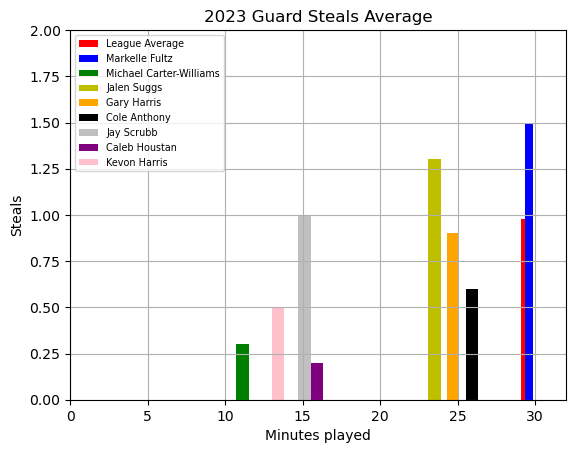

In [73]:
plt.bar(league_average_guard["Minutes"],league_average_guard["Steals"],color="r",label="League Average")
plt.bar(m_fultz["Minutes"],m_fultz["Steals"],color="blue",label="Markelle Fultz", width=.5)
plt.bar(mc_will["Minutes"],mc_will["Steals"],color="g",label="Michael Carter-Williams")
plt.bar(j_sug["Minutes"],j_sug["Steals"],color="y",label="Jalen Suggs")
plt.bar(g_har["Minutes"],g_har["Steals"],color="orange",label="Gary Harris")
plt.bar(c_ant["Minutes"],c_ant["Steals"],color="black",label="Cole Anthony")
plt.bar(j_scrub["Minutes"],j_scrub["Steals"],color="silver",label="Jay Scrubb")
plt.bar(C_hou["Minutes"],C_hou["Steals"],color="purple",label="Caleb Houstan")
plt.bar(k_har["Minutes"],k_har["Steals"],color="pink",label="Kevon Harris")

plt.title("2023 Guard Steals Average")
plt.xlabel("Minutes played")
plt.ylabel("Steals")
plt.legend(fontsize="x-small")
plt.xlim(0,32)
plt.ylim(0,2)
plt.grid()
plt.show()

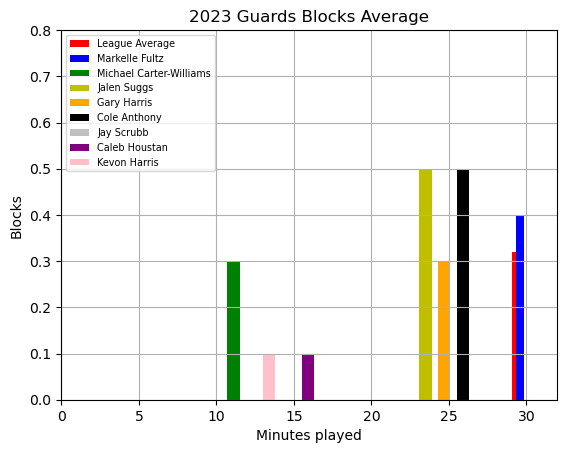

In [74]:
plt.bar(league_average_guard["Minutes"],league_average_guard["Blocks"],color="r",label="League Average")
plt.bar(m_fultz["Minutes"],m_fultz["Blocks"],color="blue",label="Markelle Fultz", width=.5)
plt.bar(mc_will["Minutes"],mc_will["Blocks"],color="g",label="Michael Carter-Williams")
plt.bar(j_sug["Minutes"],j_sug["Blocks"],color="y",label="Jalen Suggs")
plt.bar(g_har["Minutes"],g_har["Blocks"],color="orange",label="Gary Harris")
plt.bar(c_ant["Minutes"],c_ant["Blocks"],color="black",label="Cole Anthony")
plt.bar(j_scrub["Minutes"],j_scrub["Blocks"],color="silver",label="Jay Scrubb")
plt.bar(C_hou["Minutes"],C_hou["Blocks"],color="purple",label="Caleb Houstan")
plt.bar(k_har["Minutes"],k_har["Blocks"],color="pink",label="Kevon Harris")

plt.title("2023 Guards Blocks Average")
plt.xlabel("Minutes played")
plt.ylabel("Blocks")
plt.legend(fontsize="x-small")
plt.xlim(0,32)
plt.ylim(0,.8)
plt.grid()
plt.show()

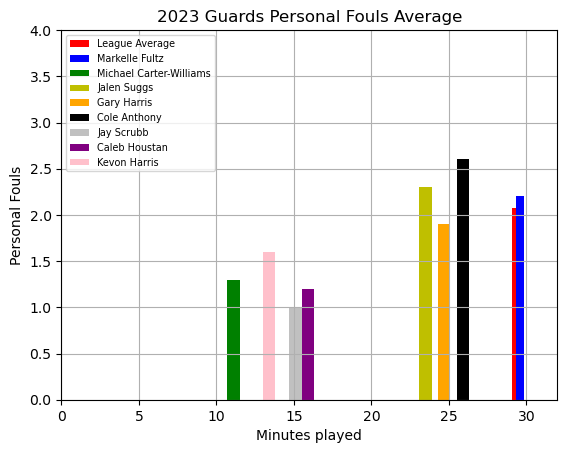

In [76]:
plt.bar(league_average_guard["Minutes"],league_average_guard["Personal Foul"],color="r",label="League Average")
plt.bar(m_fultz["Minutes"],m_fultz["Personal Foul"],color="blue",label="Markelle Fultz", width=.5)
plt.bar(mc_will["Minutes"],mc_will["Personal Foul"],color="g",label="Michael Carter-Williams")
plt.bar(j_sug["Minutes"],j_sug["Personal Foul"],color="y",label="Jalen Suggs")
plt.bar(g_har["Minutes"],g_har["Personal Foul"],color="orange",label="Gary Harris")
plt.bar(c_ant["Minutes"],c_ant["Personal Foul"],color="black",label="Cole Anthony")
plt.bar(j_scrub["Minutes"],j_scrub["Personal Foul"],color="silver",label="Jay Scrubb")
plt.bar(C_hou["Minutes"],C_hou["Personal Foul"],color="purple",label="Caleb Houstan")
plt.bar(k_har["Minutes"],k_har["Personal Foul"],color="pink",label="Kevon Harris")

plt.title("2023 Guards Personal Fouls Average")
plt.xlabel("Minutes played")
plt.ylabel("Personal Fouls")
plt.legend(fontsize="x-small")
plt.xlim(0,32)
plt.ylim(0,4)
plt.grid()
plt.show()

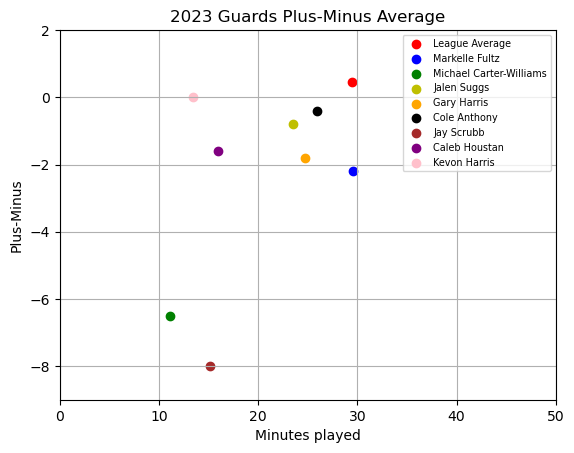

In [78]:
plt.scatter(league_average_guard["Minutes"],league_average_guard["Plus-Minus"],color="r",label="League Average")
plt.scatter(m_fultz["Minutes"],m_fultz["Plus-Minus"],color="blue",label="Markelle Fultz")
plt.scatter(mc_will["Minutes"],mc_will["Plus-Minus"],color="g",label="Michael Carter-Williams")
plt.scatter(j_sug["Minutes"],j_sug["Plus-Minus"],color="y",label="Jalen Suggs")
plt.scatter(g_har["Minutes"],g_har["Plus-Minus"],color="orange",label="Gary Harris")
plt.scatter(c_ant["Minutes"],c_ant["Plus-Minus"],color="black",label="Cole Anthony")
plt.scatter(j_scrub["Minutes"],j_scrub["Plus-Minus"],color="brown",label="Jay Scrubb")
plt.scatter(C_hou["Minutes"],C_hou["Plus-Minus"],color="purple",label="Caleb Houstan")
plt.scatter(k_har["Minutes"],k_har["Plus-Minus"],color="pink",label="Kevon Harris")

plt.title("2023 Guards Plus-Minus Average")
plt.xlabel("Minutes played")
plt.ylabel("Plus-Minus")
plt.legend(fontsize="x-small")
plt.xlim(0,50)
plt.ylim(-9,2)
plt.grid()
plt.show()

# Orlando Magic Forwards Graphs

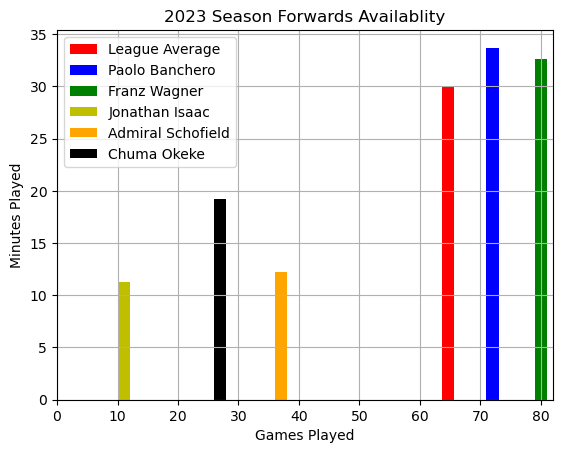

In [79]:
plt.bar(league_average_forward["Games Played"],league_average_forward["Minutes"],color="r",label="League Average",width=2)
plt.bar(p_banchero["Games Played"],p_banchero["Minutes"],color="blue",label="Paolo Banchero",width=2)
plt.bar(fr_wag["Games Played"],fr_wag["Minutes"],color="g",label="Franz Wagner",width=2)
plt.bar(jon_isa["Games Played"],jon_isa["Minutes"],color="y",label="Jonathan Isaac",width=2)
plt.bar(ad_s["Games Played"],ad_s["Minutes"],color="orange",label="Admiral Schofield",width=2)
plt.bar(c_oke["Games Played"],c_oke["Minutes"],color="black",label="Chuma Okeke",width=2)


plt.title("2023 Season Forwards Availablity")
plt.xlabel("Games Played")
plt.ylabel("Minutes Played")
plt.legend()
plt.xlim(0,82)
plt.grid()
plt.show()

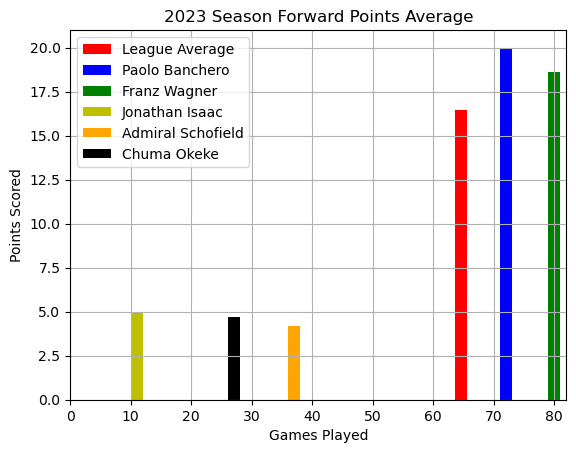

In [80]:
plt.bar(league_average_forward["Games Played"],league_average_forward["Points"],color="r",label="League Average",width=2)
plt.bar(p_banchero["Games Played"],p_banchero["Points"],color="blue",label="Paolo Banchero",width=2)
plt.bar(fr_wag["Games Played"],fr_wag["Points"],color="g",label="Franz Wagner",width=2)
plt.bar(jon_isa["Games Played"],jon_isa["Points"],color="y",label="Jonathan Isaac",width=2)
plt.bar(ad_s["Games Played"],ad_s["Points"],color="orange",label="Admiral Schofield",width=2)
plt.bar(c_oke["Games Played"],c_oke["Points"],color="black",label="Chuma Okeke",width=2)


plt.title("2023 Season Forward Points Average")
plt.xlabel("Games Played")
plt.ylabel("Points Scored")
plt.legend()
plt.xlim(0,82)
plt.grid()
plt.show()

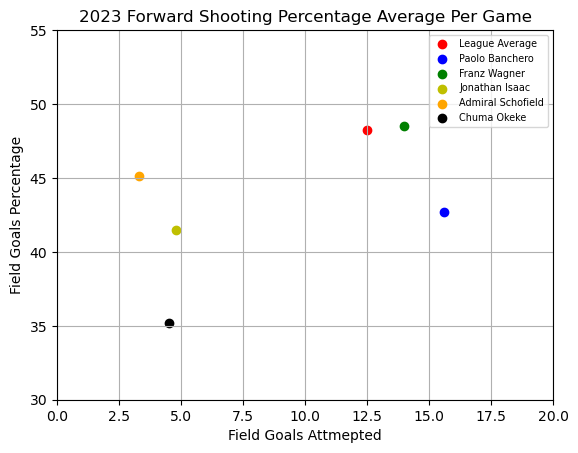

In [81]:
plt.scatter(league_average_forward["Field Goals Attmepted"],league_average_forward["Field Goal %"],color="r",label="League Average")
plt.scatter(p_banchero["Field Goals Attmepted "],p_banchero["Field Goal %"],color="blue",label="Paolo Banchero")
plt.scatter(fr_wag["Field Goals Attmepted "],fr_wag["Field Goal %"],color="g",label="Franz Wagner")
plt.scatter(jon_isa["Field Goals Attmepted "],jon_isa["Field Goal %"],color="y",label="Jonathan Isaac")
plt.scatter(ad_s["Field Goals Attmepted "],ad_s["Field Goal %"],color="orange",label="Admiral Schofield")
plt.scatter(c_oke["Field Goals Attmepted "],c_oke["Field Goal %"],color="black",label="Chuma Okeke")


plt.title("2023 Forward Shooting Percentage Average Per Game")
plt.xlabel("Field Goals Attmepted")
plt.ylabel("Field Goals Percentage")
plt.legend(fontsize="x-small",loc="best")
plt.xlim(0,20)
plt.ylim(30,55)
plt.grid()
plt.show()

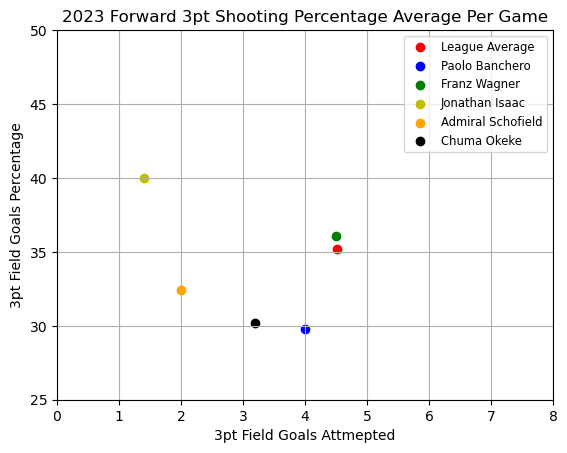

In [82]:
plt.scatter(league_average_forward["3 Points Attempted"],league_average_forward["3 Point %"],color="r",label="League Average")
plt.scatter(p_banchero["3 Points Attempted"],p_banchero["3 Point %"],color="blue",label="Paolo Banchero")
plt.scatter(fr_wag["3 Points Attempted"],fr_wag["3 Point %"],color="g",label="Franz Wagner")
plt.scatter(jon_isa["3 Points Attempted"],jon_isa["3 Point %"],color="y",label="Jonathan Isaac")
plt.scatter(ad_s["3 Points Attempted"],ad_s["3 Point %"],color="orange",label="Admiral Schofield")
plt.scatter(c_oke["3 Points Attempted"],c_oke["3 Point %"],color="black",label="Chuma Okeke")


plt.title("2023 Forward 3pt Shooting Percentage Average Per Game")
plt.xlabel("3pt Field Goals Attmepted")
plt.ylabel("3pt Field Goals Percentage")
plt.legend(fontsize="small")
plt.xlim(0,8)
plt.ylim(25,50)
plt.grid()
plt.show()

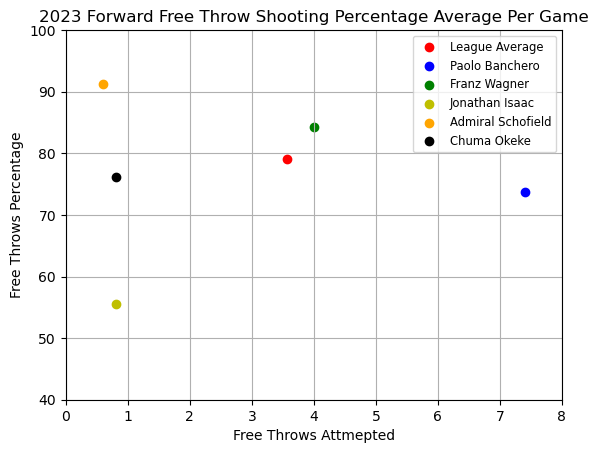

In [83]:
plt.scatter(league_average_forward["Free throw Attempted"],league_average_forward["Free Throw %"],color="r",label="League Average")
plt.scatter(p_banchero["Free throw Attempted"],p_banchero["Free Throw %"],color="blue",label="Paolo Banchero")
plt.scatter(fr_wag["Free throw Attempted"],fr_wag["Free Throw %"],color="g",label="Franz Wagner")
plt.scatter(jon_isa["Free throw Attempted"],jon_isa["Free Throw %"],color="y",label="Jonathan Isaac")
plt.scatter(ad_s["Free throw Attempted"],ad_s["Free Throw %"],color="orange",label="Admiral Schofield")
plt.scatter(c_oke["Free throw Attempted"],c_oke["Free Throw %"],color="black",label="Chuma Okeke")


plt.title("2023 Forward Free Throw Shooting Percentage Average Per Game")
plt.xlabel("Free Throws Attmepted")
plt.ylabel("Free Throws Percentage")
plt.legend(fontsize="small")
plt.xlim(0,8)
plt.ylim(40,100)
plt.grid()
plt.show()

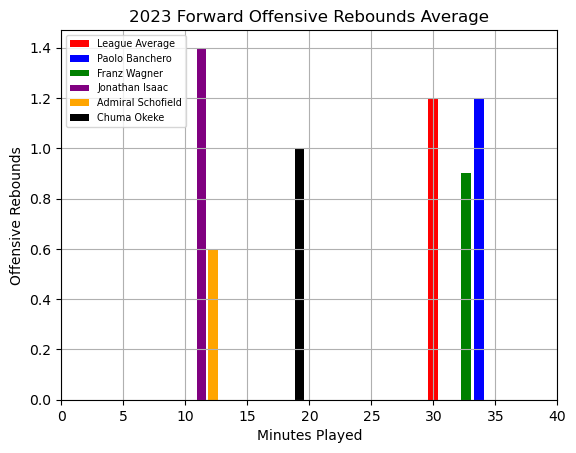

In [84]:
plt.bar(league_average_forward["Minutes"],league_average_forward["Offensive Rebound"],color="r",label="League Average")

plt.bar(p_banchero["Minutes"],p_banchero["Offensive Rebound"],color="blue",label="Paolo Banchero")

plt.bar(fr_wag["Minutes"],fr_wag["Offensive Rebound"],color="g",label="Franz Wagner")

plt.bar(jon_isa["Minutes"],jon_isa["Offensive Rebound"],color="purple",label="Jonathan Isaac")

plt.bar(ad_s["Minutes"],ad_s["Offensive Rebound"],color="orange",label="Admiral Schofield")

plt.bar(c_oke["Minutes"],c_oke["Offensive Rebound"],color="black",label="Chuma Okeke")




plt.title("2023 Forward Offensive Rebounds Average")
plt.xlabel("Minutes Played")
plt.ylabel("Offensive Rebounds")
plt.legend(fontsize="x-small", loc="best")
plt.xlim(0,40)
plt.grid()
plt.show()

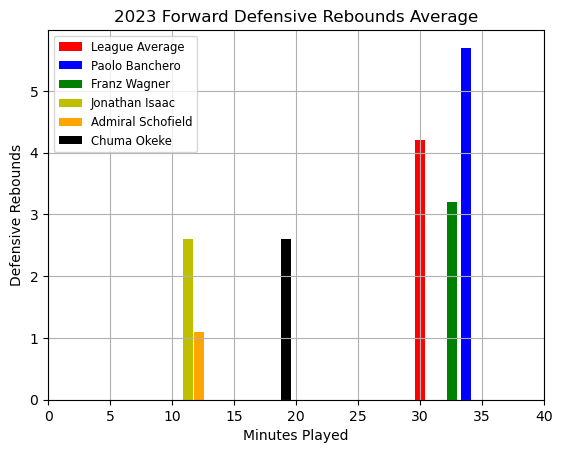

In [85]:
plt.bar(league_average_forward["Minutes"],league_average_forward["Defensive Rebound"],color="r",label="League Average")
plt.bar(p_banchero["Minutes"],p_banchero["Defensive Rebound"],color="blue",label="Paolo Banchero")
plt.bar(fr_wag["Minutes"],fr_wag["Defensive Rebound"],color="g",label="Franz Wagner")
plt.bar(jon_isa["Minutes"],jon_isa["Defensive Rebound"],color="y",label="Jonathan Isaac")
plt.bar(ad_s["Minutes"],ad_s["Defensive Rebound"],color="orange",label="Admiral Schofield")
plt.bar(c_oke["Minutes"],c_oke["Defensive Rebound"],color="black",label="Chuma Okeke")


plt.title("2023 Forward Defensive Rebounds Average")
plt.xlabel("Minutes Played")
plt.ylabel("Defensive Rebounds")
plt.legend(fontsize="small")
plt.xlim(0,40)
plt.grid()
plt.show()

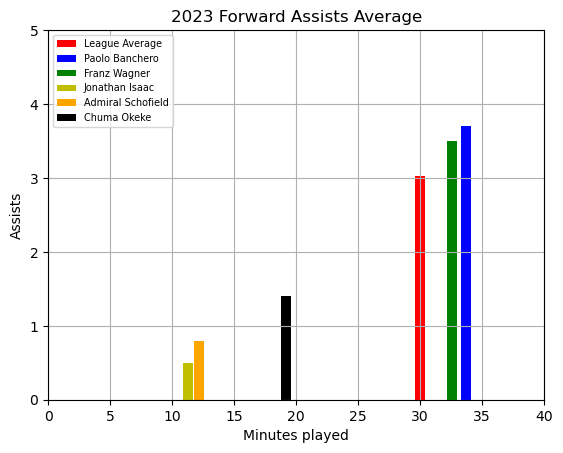

In [86]:
plt.bar(league_average_forward["Minutes"],league_average_forward["Assists"],color="r",label="League Average")
plt.bar(p_banchero["Minutes"],p_banchero["Assists "],color="blue",label="Paolo Banchero")
plt.bar(fr_wag["Minutes"],fr_wag["Assists "],color="g",label="Franz Wagner")
plt.bar(jon_isa["Minutes"],jon_isa["Assists "],color="y",label="Jonathan Isaac")
plt.bar(ad_s["Minutes"],ad_s["Assists "],color="orange",label="Admiral Schofield")
plt.bar(c_oke["Minutes"],c_oke["Assists "],color="black",label="Chuma Okeke")


plt.title("2023 Forward Assists Average")
plt.xlabel("Minutes played")
plt.ylabel("Assists")
plt.legend(fontsize="x-small")
plt.xlim(0,40)
plt.ylim(0,5)
plt.grid()
plt.show()

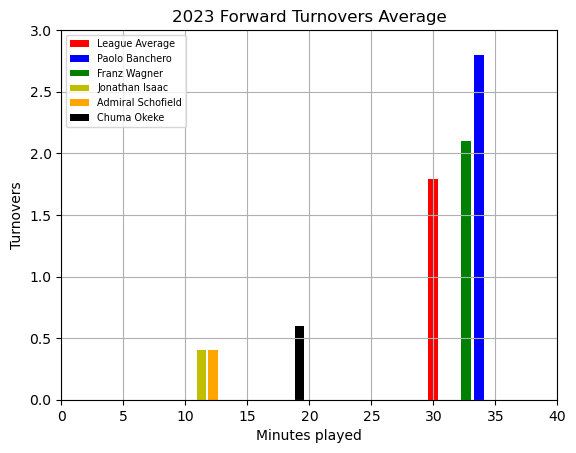

In [87]:
plt.bar(league_average_forward["Minutes"],league_average_forward["Turnover"],color="r",label="League Average")
plt.bar(p_banchero["Minutes"],p_banchero["Turnover"],color="blue",label="Paolo Banchero")
plt.bar(fr_wag["Minutes"],fr_wag["Turnover"],color="g",label="Franz Wagner")
plt.bar(jon_isa["Minutes"],jon_isa["Turnover"],color="y",label="Jonathan Isaac")
plt.bar(ad_s["Minutes"],ad_s["Turnover"],color="orange",label="Admiral Schofield")
plt.bar(c_oke["Minutes"],c_oke["Turnover"],color="black",label="Chuma Okeke")


plt.title("2023 Forward Turnovers Average")
plt.xlabel("Minutes played")
plt.ylabel("Turnovers")
plt.legend(fontsize="x-small")
plt.xlim(0,40)
plt.ylim(0,3)
plt.grid()
plt.show()

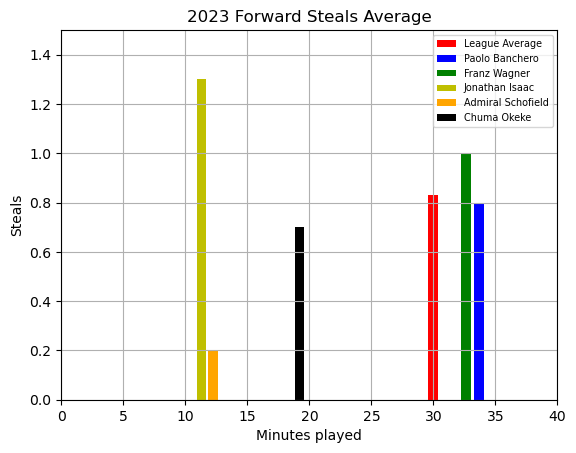

In [88]:
plt.bar(league_average_forward["Minutes"],league_average_forward["Steals"],color="r",label="League Average")
plt.bar(p_banchero["Minutes"],p_banchero["Steals"],color="blue",label="Paolo Banchero")
plt.bar(fr_wag["Minutes"],fr_wag["Steals"],color="g",label="Franz Wagner")
plt.bar(jon_isa["Minutes"],jon_isa["Steals"],color="y",label="Jonathan Isaac")
plt.bar(ad_s["Minutes"],ad_s["Steals"],color="orange",label="Admiral Schofield")
plt.bar(c_oke["Minutes"],c_oke["Steals"],color="black",label="Chuma Okeke")


plt.title("2023 Forward Steals Average")
plt.xlabel("Minutes played")
plt.ylabel("Steals")
plt.legend(fontsize="x-small")
plt.xlim(0,40)
plt.ylim(0,1.5)
plt.grid()
plt.show()

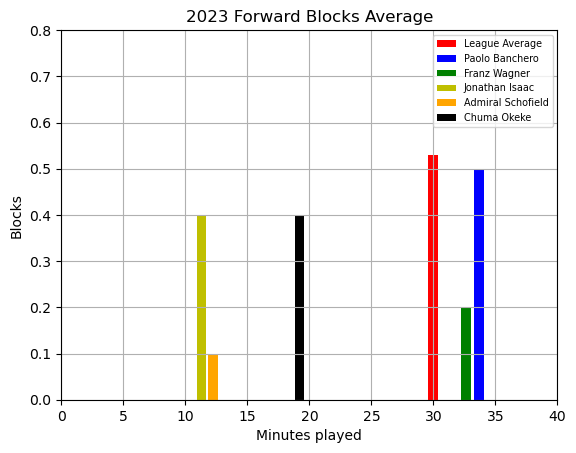

In [89]:
plt.bar(league_average_forward["Minutes"],league_average_forward["Blocks"],color="r",label="League Average")
plt.bar(p_banchero["Minutes"],p_banchero["Blocks"],color="blue",label="Paolo Banchero")
plt.bar(fr_wag["Minutes"],fr_wag["Blocks"],color="g",label="Franz Wagner")
plt.bar(jon_isa["Minutes"],jon_isa["Blocks"],color="y",label="Jonathan Isaac")
plt.bar(ad_s["Minutes"],ad_s["Blocks"],color="orange",label="Admiral Schofield")
plt.bar(c_oke["Minutes"],c_oke["Blocks"],color="black",label="Chuma Okeke")


plt.title("2023 Forward Blocks Average")
plt.xlabel("Minutes played")
plt.ylabel("Blocks")
plt.legend(fontsize="x-small")
plt.xlim(0,40)
plt.ylim(0,.8)
plt.grid()
plt.show()

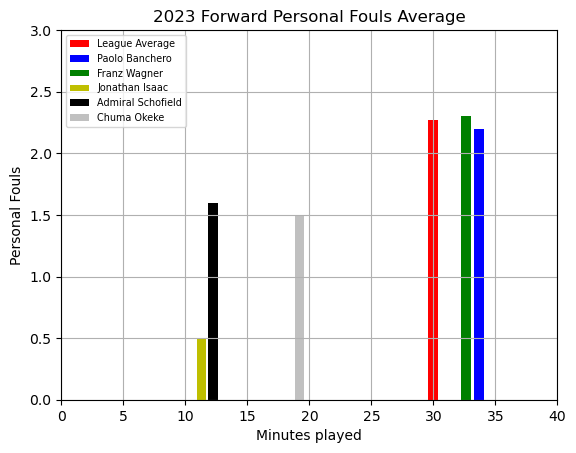

In [90]:
plt.bar(league_average_forward["Minutes"],league_average_forward["Personal Foul"],color="r",label="League Average")
plt.bar(p_banchero["Minutes"],p_banchero["Personal Foul"],color="blue",label="Paolo Banchero")
plt.bar(fr_wag["Minutes"],fr_wag["Personal Foul"],color="g",label="Franz Wagner")
plt.bar(jon_isa["Minutes"],jon_isa["Personal Foul"],color="y",label="Jonathan Isaac")
plt.bar(ad_s["Minutes"],ad_s["Personal Foul"],color="black",label="Admiral Schofield")
plt.bar(c_oke["Minutes"],c_oke["Personal Foul"],color="silver",label="Chuma Okeke")

plt.title("2023 Forward Personal Fouls Average")
plt.xlabel("Minutes played")
plt.ylabel("Personal Fouls")
plt.legend(fontsize="x-small")
plt.xlim(0,40)
plt.ylim(0,3)
plt.grid()
plt.show()

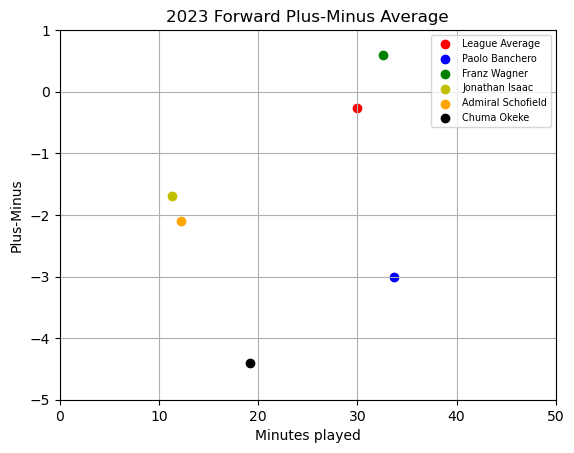

In [91]:
plt.scatter(league_average_forward["Minutes"],league_average_forward["Plus-Minus"],color="r",label="League Average")
plt.scatter(p_banchero["Minutes"],p_banchero["Plus-Minus"],color="blue",label="Paolo Banchero")
plt.scatter(fr_wag["Minutes"],fr_wag["Plus-Minus"],color="g",label="Franz Wagner")
plt.scatter(jon_isa["Minutes"],jon_isa["Plus-Minus"],color="y",label="Jonathan Isaac")
plt.scatter(ad_s["Minutes"],ad_s["Plus-Minus"],color="orange",label="Admiral Schofield")
plt.scatter(c_oke["Minutes"],c_oke["Plus-Minus"],color="black",label="Chuma Okeke")


plt.title("2023 Forward Plus-Minus Average")
plt.xlabel("Minutes played")
plt.ylabel("Plus-Minus")
plt.legend(fontsize="x-small")
plt.xlim(0,50)
plt.ylim(-5,1)
plt.grid()
plt.show()

# Magic Centers Graphs

FileNotFoundError: [Errno 2] No such file or directory: 'images/center_games.png'

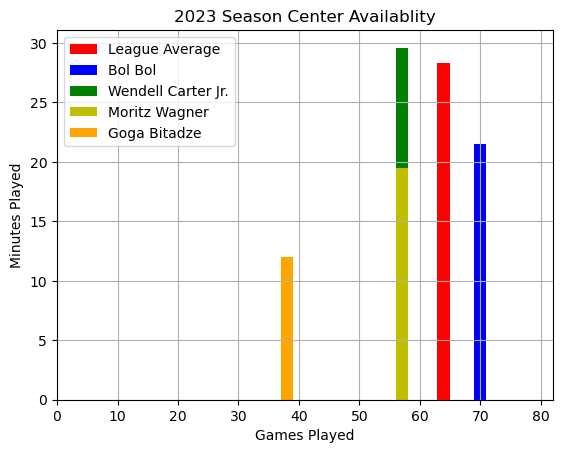

In [92]:
plt.bar(league_average_center["Games Played"],league_average_center["Minutes"],color="r",label="League Average",width=2)
plt.bar(bol["Games Played"],bol["Minutes"],color="blue",label="Bol Bol",width=2)
plt.bar(wen_car["Games Played"],wen_car["Minutes"],color="g",label="Wendell Carter Jr.",width=2)
plt.bar(mo_wag["Games Played"],mo_wag["Minutes"],color="y",label="Moritz Wagner",width=2)
plt.bar(go_bit["Games Played"],go_bit["Minutes"],color="orange",label="Goga Bitadze",width=2)


plt.title("2023 Season Center Availablity")
plt.xlabel("Games Played")
plt.ylabel("Minutes Played")
plt.legend()
plt.xlim(0,82)
plt.grid()
plt.savefig("images/center_games.png")
plt.show()

In [ ]:
plt.bar(league_average_center["Games Played"],league_average_center["Points"],color="r",label="League Average",width=2)
plt.bar(bol["Games Played"],bol["Points"],color="blue",label="Bol Bol",width=2)
plt.bar(wen_car["Games Played"],wen_car["Points"],color="g",label="Wendell Carter Jr.",width=2)
plt.bar(mo_wag["Games Played"],mo_wag["Points"],color="y",label="Moritz Wagner",width=2)
plt.bar(go_bit["Games Played"],go_bit["Points"],color="orange",label="Goga Bitadze",width=2)



plt.title("2023 Season Center Points Average")
plt.xlabel("Games Played")
plt.ylabel("Points Scored")
plt.legend()
plt.xlim(0,82)
plt.grid()
plt.show()

In [ ]:
plt.scatter(league_average_center["Field Goals Attmepted"],league_average_center["Field Goal %"],color="r",label="League Average")
plt.scatter(bol["Field Goals Attmepted "],bol["Field Goal %"],color="blue",label="Bol Bol")
plt.scatter(wen_car["Field Goals Attmepted "],wen_car["Field Goal %"],color="g",label="Wendell Carter Jr.")
plt.scatter(mo_wag["Field Goals Attmepted "],mo_wag["Field Goal %"],color="y",label="Moritz Wagner")
plt.scatter(go_bit["Field Goals Attmepted "],go_bit["Field Goal %"],color="orange",label="Goga Bitadze")



plt.title("2023 Center Shooting Percentage Average Per Game")
plt.xlabel("Field Goals Attmepted")
plt.ylabel("Field Goals Percentage")
plt.legend(fontsize="xx-small",loc="upper right")
plt.xlim(0,20)
plt.ylim(40,60)
plt.grid()
plt.show()

In [ ]:
plt.scatter(league_average_center["3 Points Attempted"],league_average_center["3 Point %"],color="r",label="League Average")
plt.scatter(bol["3 Points Attempted"],bol["3 Point %"],color="blue",label="Bol Bol")
plt.scatter(wen_car["3 Points Attempted"],wen_car["3 Point %"],color="g",label="Wendell Carter Jr.")
plt.scatter(mo_wag["3 Points Attempted"],mo_wag["3 Point %"],color="y",label="Moritz Wagner")
plt.scatter(go_bit["3 Points Attempted"],go_bit["3 Point %"],color="orange",label="Goga Bitadze")


plt.title("2023 Center 3pt Shooting Percentage Average Per Game")
plt.xlabel("3pt Field Goals Attmepted")
plt.ylabel("3pt Field Goals Percentage")
plt.legend(fontsize="small")
plt.xlim(0,8)
plt.ylim(15,45)
plt.grid()
plt.show()

In [ ]:
plt.scatter(league_average_center["Free throw Attempted"],league_average_center["Free Throw %"],color="r",label="League Average")
plt.scatter(bol["Free throw Attempted"],bol["Free Throw %"],color="blue",label="Bol Bol")
plt.scatter(wen_car["Free throw Attempted"],wen_car["Free Throw %"],color="g",label="Wendell Carter Jr.")
plt.scatter(mo_wag["Free throw Attempted"],mo_wag["Free Throw %"],color="y",label="Moritz Wagner")
plt.scatter(go_bit["Free throw Attempted"],go_bit["Free Throw %"],color="orange",label="Goga Bitadze")


plt.title("2023 Center Free Throw Shooting Percentage Average Per Game")
plt.xlabel("Free Throws Attmepted")
plt.ylabel("Free Throws Percentage")
plt.legend(fontsize="small")
plt.xlim(0,8)
plt.ylim(50,90)
plt.grid()
plt.show()

In [ ]:
plt.bar(league_average_center["Minutes"],league_average_center["Offensive Rebound"],color="r",label="League Average")

plt.bar(bol["Minutes"],bol["Offensive Rebound"],color="blue",label="Bol Bol", width=.75)

plt.bar(wen_car["Minutes"],wen_car["Offensive Rebound"],color="g",label="Wendell Carter Jr.")

plt.bar(mo_wag["Minutes"],mo_wag["Offensive Rebound"],color="purple",label="Moritz Wagner")

plt.bar(go_bit["Minutes"],go_bit["Offensive Rebound"],color="orange",label="Goga Bitadze")





plt.title("2023 Center Offensive Rebounds Average")
plt.xlabel("Minutes Played")
plt.ylabel("Offensive Rebounds")
plt.legend(fontsize="x-small", loc="best")
plt.xlim(0,40)
plt.grid()

plt.show()

In [ ]:
plt.bar(league_average_center["Minutes"],league_average_center["Defensive Rebound"],color="r",label="League Average")
plt.bar(bol["Minutes"],bol["Defensive Rebound"],color="blue",label="Bol Bol")
plt.bar(wen_car["Minutes"],wen_car["Defensive Rebound"],color="g",label="Wendell Carter Jr.")
plt.bar(mo_wag["Minutes"],mo_wag["Defensive Rebound"],color="y",label="Moritz Wagner")
plt.bar(go_bit["Minutes"],go_bit["Defensive Rebound"],color="orange",label="Goga Bitadze")



plt.title("2023 Center Defensive Rebounds Average")
plt.xlabel("Minutes Played")
plt.ylabel("Defensive Rebounds")
plt.legend(fontsize="small")
plt.xlim(0,40)
plt.grid()
plt.show()

In [ ]:
plt.bar(league_average_center["Minutes"],league_average_center["Assists"],color="r",label="League Average")
plt.bar(bol["Minutes"],bol["Assists "],color="blue",label="Bol Bol", width=.75)
plt.bar(wen_car["Minutes"],wen_car["Assists "],color="g",label="Wendell Carter Jr.")
plt.bar(mo_wag["Minutes"],mo_wag["Assists "],color="y",label="Moritz Wagner")
plt.bar(go_bit["Minutes"],go_bit["Assists "],color="orange",label="Goga Bitadze")


plt.title("2023 Center Assists Average")
plt.xlabel("Minutes played")
plt.ylabel("Assists")
plt.legend(fontsize="x-small")
plt.xlim(0,40)
plt.ylim(0,5)

plt.grid()
plt.show()

In [ ]:
plt.bar(league_average_center["Minutes"],league_average_center["Turnover"],color="r",label="League Average")
plt.bar(bol["Minutes"],bol["Turnover"],color="blue",label="Bol Bol")
plt.bar(wen_car["Minutes"],wen_car["Turnover"],color="g",label="Wendell Carter Jr.")
plt.bar(mo_wag["Minutes"],mo_wag["Turnover"],color="y",label="Moritz Wagner")
plt.bar(go_bit["Minutes"],go_bit["Turnover"],color="black",label="Goga Bitadze")


plt.title("2023 Center Turnovers Average")
plt.xlabel("Minutes played")
plt.ylabel("Turnovers")
plt.legend(fontsize="x-small")
plt.xlim(0,40)
plt.ylim(0,3)
plt.grid()
plt.show()

In [ ]:
plt.bar(league_average_center["Minutes"],league_average_center["Steals"],color="r",label="League Average")
plt.bar(bol["Minutes"],bol["Steals"],color="blue",label="Bol Bol")
plt.bar(wen_car["Minutes"],wen_car["Steals"],color="g",label="Wendell Carter Jr.")
plt.bar(mo_wag["Minutes"],mo_wag["Steals"],color="y",label="Moritz Wagner")
plt.bar(go_bit["Minutes"],go_bit["Steals"],color="orange",label="Goga Bitadze")



plt.title("2023 Center Steals Average")
plt.xlabel("Minutes played")
plt.ylabel("Steals")
plt.legend(fontsize="x-small")
plt.xlim(0,40)
plt.ylim(0,1.5)
plt.grid()
plt.show()

In [ ]:
plt.bar(league_average_center["Minutes"],league_average_center["Blocks"],color="r",label="League Average")
plt.bar(bol["Minutes"],bol["Blocks"],color="blue",label="Bol Bol")
plt.bar(wen_car["Minutes"],wen_car["Blocks"],color="g",label="Wendell Carter Jr.", width=.75)
plt.bar(mo_wag["Minutes"],mo_wag["Blocks"],color="y",label="Moritz Wagner")
plt.bar(go_bit["Minutes"],go_bit["Blocks"],color="orange",label="Goga Bitadze")



plt.title("2023 Center Blocks Average")
plt.xlabel("Minutes played")
plt.ylabel("Blocks")
plt.legend(fontsize="x-small")
plt.xlim(0,35)
plt.ylim(0, 1.5)
plt.grid()
plt.show()

In [ ]:
plt.bar(league_average_center["Minutes"],league_average_center["Personal Foul"],color="r",label="League Average")
plt.bar(bol["Minutes"],bol["Personal Foul"],color="blue",label="Bol Bol")
plt.bar(wen_car["Minutes"],wen_car["Personal Foul"],color="g",label="Wendell Carter Jr.", width=.75)
plt.bar(mo_wag["Minutes"],mo_wag["Personal Foul"],color="y",label="Moritz Wagner")
plt.bar(go_bit["Minutes"],go_bit["Personal Foul"],color="orange",label="Goga Bitadze")

plt.title("2023 Center Personal Fouls Average")
plt.xlabel("Minutes played")
plt.ylabel("Personal Fouls")
plt.legend(fontsize="x-small")
plt.xlim(0,35)
plt.ylim(0,4)
plt.grid()
plt.show()

In [ ]:
plt.scatter(league_average_center["Minutes"],league_average_center["Plus-Minus"],color="r",label="League Average")
plt.scatter(bol["Minutes"],bol["Plus-Minus"],color="blue",label="Bol Bol")
plt.scatter(wen_car["Minutes"],wen_car["Plus-Minus"],color="g",label="Wendell Carter Jr.")
plt.scatter(mo_wag["Minutes"],mo_wag["Plus-Minus"],color="y",label="Moritz Wagner")
plt.scatter(go_bit["Minutes"],go_bit["Plus-Minus"],color="orange",label="Goga Bitadze")



plt.title("2023 Center Plus-Minus Average")
plt.xlabel("Minutes played")
plt.ylabel("Plus-Minus")
plt.legend(fontsize="x-small")
plt.xlim(0,35)
plt.ylim(-2.5,1)
plt.grid()
plt.show()


## Bethel Brenton
Linear Regression to determine which KPI(s) have a strong positive relationship with wins.

In [ ]:
# Display the data table for preview
magic22_23_df.head(100)

In [ ]:
#Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,y_title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Wins")
    plt.ylabel(y_title)
    print(f"The r-squared is: {rvalue}")
    plt.show()
    return rvalue

In [ ]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["Blocks"]
r = plot_linear_regression(x_values,y_values,'Blocks',(2,90))

magic_rvalues = pd.DataFrame({'KPI':["Blocks"], 'r':[r]}) 
magic_rvalues.head()

In [ ]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["Steals"]
r = plot_linear_regression(x_values,y_values,'Steals',(2,90))

df_new_row = pd.DataFrame({'KPI':["Steals"], 'r':[r]}) 
magic_rvalues = pd.concat([magic_rvalues, df_new_row])

In [ ]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["Rebounds"]
r = plot_linear_regression(x_values,y_values,'Rebounds',(20,90))

df_new_row = pd.DataFrame({'KPI':["Rebounds"], 'r':[r]}) 
magic_rvalues = pd.concat([magic_rvalues, df_new_row])

In [ ]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["Free Throw Made"]
r = plot_linear_regression(x_values,y_values,'Free Throw Made',(20,90))

df_new_row = pd.DataFrame({'KPI':["Free Throw Made"], 'r':[r]}) 
magic_rvalues = pd.concat([magic_rvalues, df_new_row])

In [ ]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["3 Points Made"]
r = plot_linear_regression(x_values,y_values,'3 Points Made',(10,90))

df_new_row = pd.DataFrame({'KPI':["3 Points Made"], 'r':[r]}) 
magic_rvalues = pd.concat([magic_rvalues, df_new_row])

In [ ]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["Turnover"]
r = plot_linear_regression(x_values,y_values,'Turnover',(10,90))

df_new_row = pd.DataFrame({'KPI':["Turnover"], 'r':[r]}) 
magic_rvalues = pd.concat([magic_rvalues, df_new_row])

In [ ]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["Field Goals Made"]
r = plot_linear_regression(x_values,y_values,'Field Goals Made',(15,90))

df_new_row = pd.DataFrame({'KPI':["Field Goals Made"], 'r':[r]}) 
magic_rvalues = pd.concat([magic_rvalues, df_new_row], ignore_index=True)

In [ ]:
magic_rvalues = magic_rvalues.sort_values(by='r', ascending=True, ignore_index=False)
magic_rvalues.head(10)

In [ ]:
plt.barh(magic_rvalues["KPI"], magic_rvalues["r"])
plt.title("Correlation between KPIs and Wins", size=14)
plt.xlabel("Linear Regression (r)")
plt.ylabel("Key Performance Indicator(KPI)")
plt.show()

##### Analysis: According to the Pearson Correlation Coefficient Table the KPIs all had a positive relations to wins, however, the ones that had a strong positive relationship with Wins are: Field Goals Made, Free Throws Made, and Rebounds. Whilst, 3 Points made shows a moderate positive effect on Wins. The KPIs least related to Wins are: Steals and Blocks.

# Jessica Richter

In [7]:
# Set paths
data_all_seasons = ("data/All_Seasons.csv")
data96 = ("data/1995_1996 Season.csv")
data10 = ("data/2009_2010 Season.csv")
data09 = ("data/2008_2009 Season.csv")
data95 = ("data/1994_1995 Season.csv")
data99 = ("data/1998_1999 Season.csv")
data23 = ("data/2022_2023 Season.csv")
data22 = ("data/2021_2022 Season.csv")
data04 = ("data/2003_2004 Season.csv")
data92 = ("data/1991_1992 Season.csv")
data13 = ("data/2012_2013 Season.csv")
data90 = ("data/1989_1990 Season.csv")

In [9]:
# Read in data
all_seasons_df = pd.read_csv(data_all_seasons)
season96_df = pd.read_csv(data96)
season10_df = pd.read_csv(data10)
season09_df = pd.read_csv(data09)
season95_df = pd.read_csv(data95)
season99_df = pd.read_csv(data99)
season23_df = pd.read_csv(data23)
season22_df = pd.read_csv(data22)
season04_df = pd.read_csv(data04)
season92_df = pd.read_csv(data92)
season13_df = pd.read_csv(data13)
season90_df = pd.read_csv(data90)

In [10]:
# Set list for graph labels
seasons = ["1995_1996", "2009_2010", "2008-2009", "1994-1995", "1998_1999", "2022-2023"] 

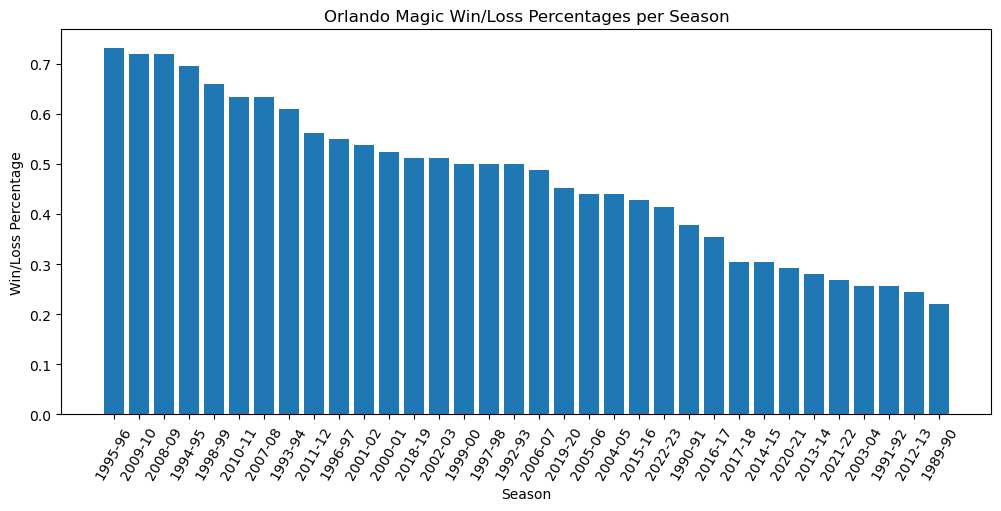

In [11]:
# Create bar chart of all seasons' win/loss percentages
fig = plt.figure(figsize = (12, 5))
plt.bar(all_seasons_df["Season"], all_seasons_df["W/L%"])
plt.xticks(rotation=60)
plt.xlabel("Season")
plt.ylabel("Win/Loss Percentage")
plt.title("Orlando Magic Win/Loss Percentages per Season")
plt.show()

In [12]:
# Compare recent season's win/loss percentage to overall average.
avg_wl_percentage = all_seasons_df["W/L%"].mean()
recent_wl_percentage = all_seasons_df.loc[all_seasons_df["Season"] == "2022-23", "W/L%"]

print(f"The Orlando Magic's average win/loss percentage since 1989 is {round(avg_wl_percentage, 3)}.")
print(f"The Orlando Magic's average win/loss percentage in the 2022-2023 season was {recent_wl_percentage}.")

The Orlando Magic's average win/loss percentage since 1989 is 0.468.
The Orlando Magic's average win/loss percentage in the 2022-2023 season was 22    0.415
Name: W/L%, dtype: float64.


In [15]:
# Create dataframe to list top 5 seasons, last season, and bottom 5 seasons in terms of win/loss percentages
top_bottom_current = all_seasons_df.loc[(all_seasons_df["W/L%"] > 0.65) | (all_seasons_df["Season"] == "2022-23") | (all_seasons_df["W/L%"] < 0.28)]

# Reset the index
top_bottom_current = top_bottom_current.reset_index(drop=False, inplace=False)
top_bottom_current

,index,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,Playoffs
0,0,1995-96,NBA,Orlando Magic,60,22,0.732,1st of 7,5.40,91.8,0.0,112.9,5.3,106.9,-0.7,Lost E. Conf. Finals
1,1,2009-10,NBA,Orlando Magic,59,23,0.720,1st of 5,7.12,92.0,-0.7,111.4,3.8,103.3,-4.3,Lost E. Conf. Finals
2,2,2008-09,NBA,Orlando Magic,59,23,0.720,1st of 5,6.48,92.3,0.6,109.2,0.9,101.9,-6.4,Lost Finals
3,3,1994-95,NBA,Orlando Magic,57,25,0.695,1st of 7,6.44,95.1,2.2,115.1,6.8,107.8,-0.5,Lost Finals
4,4,1998-99,NBA,Orlando Magic,33,17,0.660,2nd of 7,3.11,88.8,-0.1,100.3,-1.9,97.4,-4.8,Lost E. Conf. 1st Rnd.
5,22,2022-23,NBA,Orlando Magic,34,48,0.415,4th of 5,-2.39,99.3,0.2,111.6,-3.2,114.2,-0.6,NaN
6,29,2021-22,NBA,Orlando Magic,22,60,0.268,5th of 5,-7.67,99.2,1.0,104.5,-7.5,112.5,0.5,NaN
7,30,2003-04,NBA,Orlando Magic,21,61,0.256,7th of 7,-7.25,90.8,0.7,102.7,-0.2,110.4,7.5,NaN
8,31,1991-92,NBA,Orlando Magic,21,61,0.256,7th of 7,-6.52,98.0,1.4,103.5,-4.7,110.5,2.3,NaN
9,32,2012-13,NBA,Orlando Magic,20,62,0.244,5th of 5,-7.12,92.2,0.2,101.6,-4.3,109.1,3.2,NaN


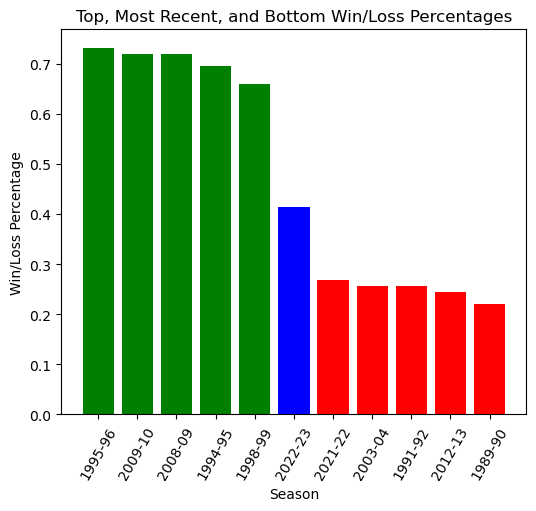

In [16]:
# Create a bar chart of top 5 seasons, last season, and bottom 5 seasons' win/loss percentages
fig = plt.figure(figsize = (6, 5))

x_data = top_bottom_current["Season"]
y_data = top_bottom_current["W/L%"]

plt.bar(x_data[0],y_data[0],color="green")
plt.bar(x_data[1],y_data[1],color="green")
plt.bar(x_data[2],y_data[2],color="green")
plt.bar(x_data[3],y_data[3],color="green")
plt.bar(x_data[4],y_data[4],color="green")
plt.bar(x_data[5],y_data[5],color="blue")
plt.bar(x_data[6],y_data[6],color="red")
plt.bar(x_data[7],y_data[7],color="red")
plt.bar(x_data[8],y_data[8],color="red")
plt.bar(x_data[9],y_data[9],color="red")
plt.bar(x_data[10],y_data[10],color="red")

plt.xticks(rotation=60)
plt.xlabel("Season")
plt.ylabel("Win/Loss Percentage")
plt.title("Top, Most Recent, and Bottom Win/Loss Percentages")
plt.show()

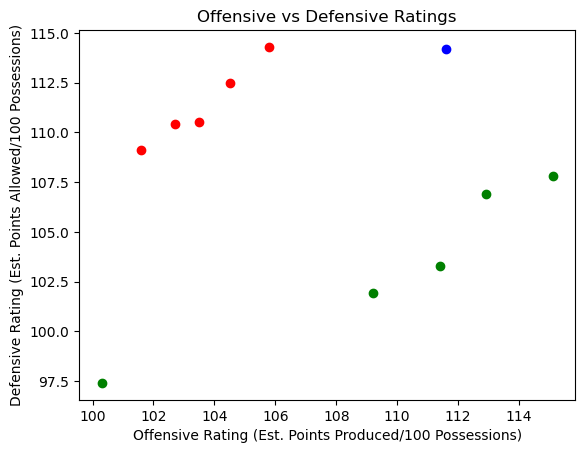

In [17]:
# Create a scatter plot of offensive versus defensive ratings
x_data = top_bottom_current["ORtg"]
y_data = top_bottom_current["DRtg"]

plt.scatter(x_data[0],y_data[0],color="green")
plt.scatter(x_data[1],y_data[1],color="green")
plt.scatter(x_data[2],y_data[2],color="green")
plt.scatter(x_data[3],y_data[3],color="green")
plt.scatter(x_data[4],y_data[4],color="green")
plt.scatter(x_data[5],y_data[5],color="blue")
plt.scatter(x_data[6],y_data[6],color="red")
plt.scatter(x_data[7],y_data[7],color="red")
plt.scatter(x_data[8],y_data[8],color="red")
plt.scatter(x_data[9],y_data[9],color="red")
plt.scatter(x_data[10],y_data[10],color="red")

plt.title("Offensive vs Defensive Ratings")
plt.xlabel("Offensive Rating (Est. Points Produced/100 Possessions)")
plt.ylabel("Defensive Rating (Est. Points Allowed/100 Possessions)")
plt.show()

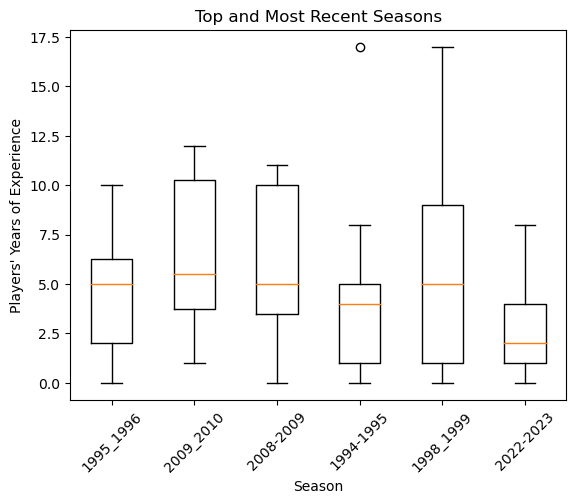

In [18]:
# Create a list of players' years of experience
player_exp_list = [season96_df['Exp'], season10_df['Exp'], season09_df['Exp'], season95_df['Exp'], season99_df['Exp'], 
                  season23_df['Exp']]

# Create a box plot of players' years of experience
fig, ax = plt.subplots()
ax.boxplot(player_exp_list)

ax.set_xticklabels(seasons)
plt.xticks(rotation=45)
ax.set_xlabel("Season")
ax.set_ylabel("Players' Years of Experience")
plt.title("Top and Most Recent Seasons")
plt.show()

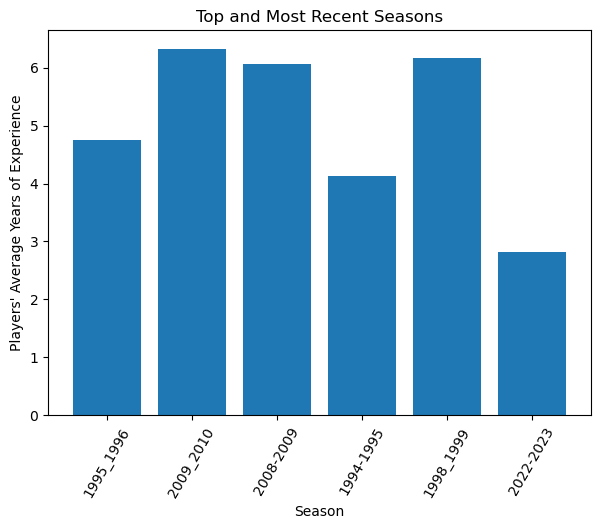

In [21]:
# Create a list of players' average years of experience
avg_player_exp_list = [season96_df['Exp'].mean(), season10_df['Exp'].mean(), season09_df['Exp'].mean(), season95_df['Exp'].mean(), 
                       season99_df['Exp'].mean(), season23_df['Exp'].mean()]

# Create a bar chart of players' average years of experience
fig = plt.figure(figsize = (7, 5))
plt.bar(seasons, avg_player_exp_list)
plt.xticks(rotation=60)
plt.xlabel("Season")
plt.ylabel("Players' Average Years of Experience")
plt.title("Top and Most Recent Seasons")
plt.show()

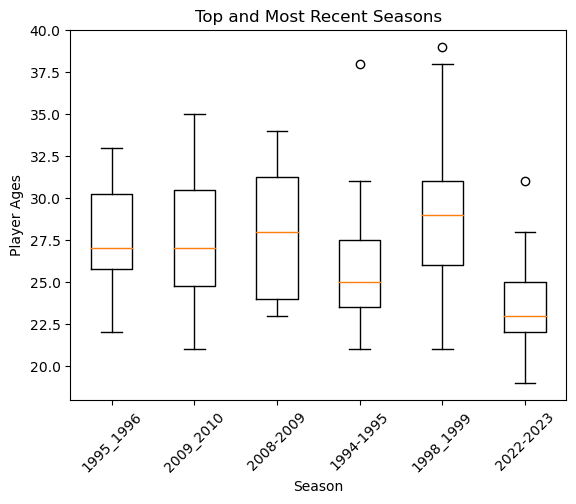

In [19]:
# Create a list of players' ages
player_age_list = [season96_df['Age'], season10_df['Age'], season09_df['Age'], season95_df['Age'], season99_df['Age'], season23_df['Age']]

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group. 
fig, ax = plt.subplots()
ax.boxplot(player_age_list)

ax.set_xticklabels(seasons)
plt.xticks(rotation=45)
ax.set_xlabel("Season")
ax.set_ylabel("Player Ages")
plt.title("Top and Most Recent Seasons")
plt.show()

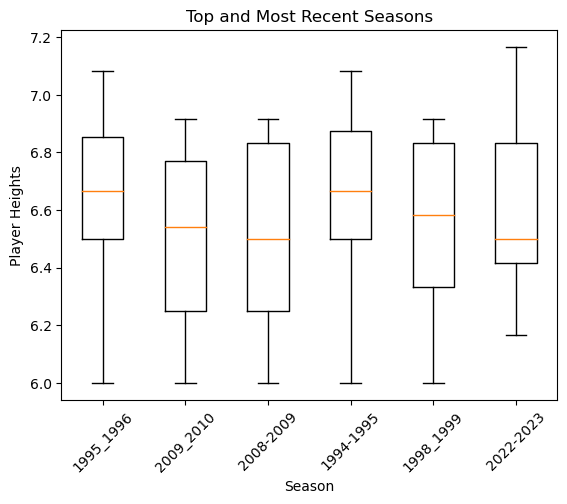

In [20]:
# Create empty list to fill with player ages
player_height_list = [season96_df['Height'], season10_df['Height'], season09_df['Height'], season95_df['Height'], season99_df['Height'], season23_df['Height']]

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group. 
fig, ax = plt.subplots()
ax.boxplot(player_height_list)

ax.set_xticklabels(seasons)
plt.xticks(rotation=45)
ax.set_xlabel("Season")
ax.set_ylabel("Player Heights")
plt.title("Top and Most Recent Seasons")
plt.show()